<a href="https://colab.research.google.com/github/Kashew765/Sales_pred_MLproject/blob/main/sales_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel("/content/advertising_sales_data.xlsx")

1. Average amount spent on TV advertising

In [7]:
average_tv_spent = df["TV"].mean()
print(f"Average TV Advertising Expenditure: ${average_tv_spent:.2f}")

Average TV Advertising Expenditure: $147.04


 2. Correlation between radio advertising expenditure and sales

In [8]:
radio_sales_corr = df["Radio"].corr(df["Sales"])
print(f"Correlation between Radio Advertising and Sales: {radio_sales_corr:.2f}")

Correlation between Radio Advertising and Sales: 0.35


 3. Identifying the advertising medium with the highest impact on sales

In [17]:
# Drop non-numeric columns before computing correlation
df_numeric = df.select_dtypes(include=[np.number])

correlations = df_numeric.corr()["Sales"].drop("Sales")
highest_impact_medium = correlations.abs().idxmax()
print(f"Advertising medium with the highest impact on Sales: {highest_impact_medium}")


Advertising medium with the highest impact on Sales: TV


4. Linear Regression Model with all variables

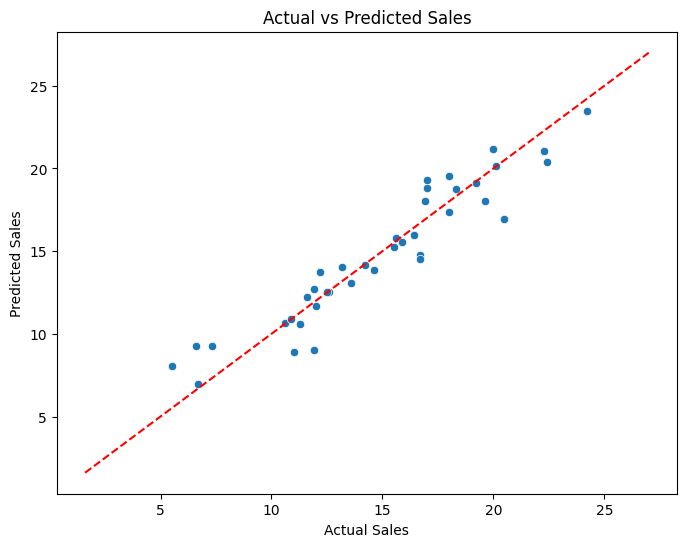

In [18]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
# Drop or fill missing values
df_numeric = df_numeric.dropna()

X = df_numeric[["TV", "Radio", "Newspaper"]]
y = df_numeric["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


5. Predicting sales for new ad expenditures

In [24]:
new_data = pd.DataFrame([[200, 40, 50]], columns=["TV", "Radio", "Newspaper"])
predicted_sales = model.predict(new_data)[0]
print(f"Predicted Sales for new expenditures: {predicted_sales:.2f}")


Predicted Sales for new expenditures: 19.82


6. Effect of normalization on model performance

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

r2_original = r2_score(y_test, y_pred)
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"R² Score without Normalization: {r2_original:.4f}")
print(f"R² Score with Normalization: {r2_scaled:.4f}")

R² Score without Normalization: 0.8991
R² Score with Normalization: 0.8991


7. Impact of using only Radio and Newspaper as predictors

In [22]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Drop or fill missing values to ensure X and y have the same length
df_numeric = df_numeric.dropna()

X_reduced = df_numeric[["Radio", "Newspaper"]]
y = df_numeric["Sales"]
assert len(X_reduced) == len(y), "Mismatch in sample sizes between X and y."
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
model_reduced = LinearRegression()
model_reduced.fit(X_train_red, y_train_red)
y_pred_red = model_reduced.predict(X_test_red)
r2_radio_newspaper = r2_score(y_test_red, y_pred_red)
print(f"R-squared using only Radio and Newspaper: {r2_radio_newspaper:.4f}")


R-squared using only Radio and Newspaper: -0.0519
